<a href="https://colab.research.google.com/github/mohmmdkhosravi/git-learning/blob/main/minProject1_Khosravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

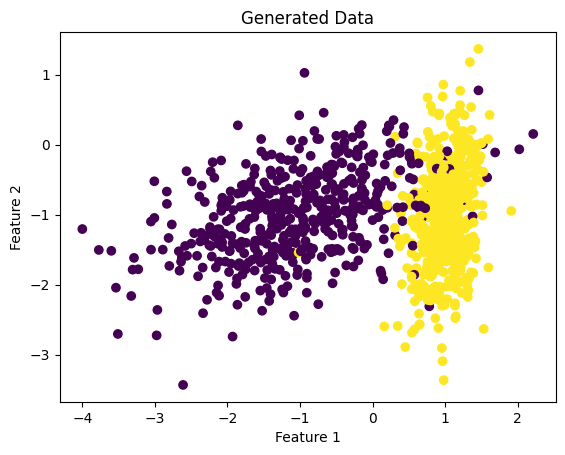

In [ ]:
#1.2
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# توليد داده‌ها
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# نمايش داده‌ها
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
#1.3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# تقسيم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تعريف مدل
model = LogisticRegression()

# تعريف فراپارامترها
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}

# جستجوی فراپارامترها با استفاده از GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# بهترين مدل
best_model = grid_search.best_estimator_

# پيش‌بینی با استفاده از مدل بهترين
y_pred = best_model.predict(X_test)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


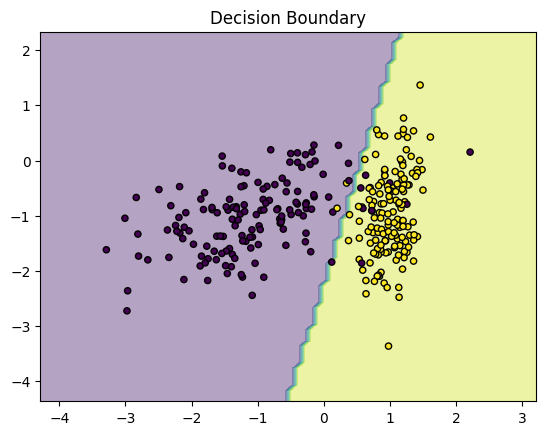

In [ ]:
#1.4

import numpy as np

# تعریف تابع برای رسم مرز تصمیم‌گیری
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
    plt.title("Decision Boundary")
    plt.show()

# رسم مرز تصمیم‌گیری
plot_decision_boundary(best_model, X_test, y_test)


In [ ]:
#1.5

import numpy as np
import pandas as pd

def extract_features(data_matrix):
    features = []
    for sample in data_matrix:
        feature_vector = [
            np.mean(sample),                   # Mean
            np.std(sample),                    # Standard Deviation
            np.max(sample),                    # Maximum
            np.min(sample),                    # Minimum
            np.median(sample),                 # Median
            np.percentile(sample, 25),         # 25th Percentile
            np.percentile(sample, 75),         # 75th Percentile
            np.var(sample)                     # Variance
        ]
        features.append(feature_vector)
    return pd.DataFrame(features, columns=['Mean', 'Std', 'Max', 'Min', 'Median', '25th Percentile', '75th Percentile', 'Variance'])

# Assuming matrix_normal and matrix_fault have been created already

# Extract features for both normal and faulty data
features_normal = extract_features(matrix_normal)
features_fault = extract_features(matrix_fault)

# Display the feature dataframes
print("Features for Normal Data:")
print(features_normal.head())

print("\nFeatures for Fault Data:")
print(features_fault.head())


NameError: name 'matrix_normal' is not defined

In [ ]:
#2.2

import numpy as np
import pandas as pd

# فرضی که داده‌ها را دانلود و بارگذاری کرده‌اید
normal_data = pd.read_csv('Normal_X1.csv')
faulty_data = pd.read_csv('IR007_X_12k.csv')

# تقسيم داده‌ها به ماتريس‌ها
def create_matrix(data, M, N):
    return np.array([data[i:i+N] for i in range(0, len(data)-N, N//2)][:M])

M = 1001
N = 200
normal_matrix = create_matrix(normal_data.values.flatten(), M, N)
faulty_matrix = create_matrix(faulty_data.values.flatten(), M, N)

# ماتریس نهایی با برچسب‌ها
normal_labels = np.zeros((normal_matrix.shape[0], 1))
faulty_labels = np.ones((faulty_matrix.shape[0], 1))

data_matrix = np.vstack((normal_matrix, faulty_matrix))
labels = np.vstack((normal_labels, faulty_labels))

# ادغام داده‌ها و برچسب‌ها
dataset = np.hstack((data_matrix, labels))


FileNotFoundError: [Errno 2] No such file or directory: 'Normal_X1.csv'

In [ ]:
#2.2.B

def extract_features(matrix):
    features = np.zeros((matrix.shape[0], 8))
    for i in range(matrix.shape[0]):
        x = matrix[i]
        features[i, 0] = np.std(x)
        features[i, 1] = np.max(x)
        features[i, 2] = np.mean(np.abs(x))
        features[i, 3] = np.sqrt(np.mean(x**2))
        features[i, 4] = np.mean(x)
        features[i, 5] = np.sum(np.abs(x)) / len(x)
        features[i, 6] = np.sum((x - np.mean(x))**3) / (len(x) * (np.std(x) ** 3))
        features[i, 7] = np.sum((x - np.mean(x))**4) / (len(x) * (np.std(x) ** 4))
    return features

normal_features = extract_features(normal_matrix)
faulty_features = extract_features(faulty_matrix)

# ادغام ویژگی‌ها و برچسب‌ها
features = np.vstack((normal_features, faulty_features))


NameError: name 'normal_matrix' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


NameError: name 'features' is not defined

In [ ]:
#2.2.D

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



from sklearn.linear_model import LogisticRegression

# آموزش مدل
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# پیش‌بینی
y_pred = model.predict(X_test_scaled)

# ارزیابی
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
#2.3

import matplotlib.pyplot as plt

# محاسبه تابع اتلاف
loss = log_loss(y_test, y_pred)

# رسم نمودار
plt.plot(range(len(loss)), loss)
plt.title("Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


In [ ]:
#2.5
#part1
import seaborn as sns

# فرض بر این است که داده‌ها در یک DataFrame به نام weather_data بارگذاری شده‌اند
correlation_matrix = weather_data.corr()

# رسم هیتمپ
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# رسم هیستوگرام پراکندگی
sns.pairplot(weather_data)
plt.show()


#part2

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# آموزش مدل LS
ls_model = LinearRegression()
ls_model.fit(X_train, y_train)

# پیش‌بینی مدل LS
y_pred_ls = ls_model.predict(X_test)

# آموزش مدل RLS
rls_model = Ridge(alpha=1.0)
rls_model.fit(X_train, y_train)

# پیش‌بینی مدل RLS
y_pred_rls = rls_model.predict(X_test)

# محاسبه خطاها
mse_ls = mean_squared_error(y_test, y_pred_ls)
mse_rls = mean_squared_error(y_test, y_pred_rls)

print(f'MSE LS: {mse_ls:.2f}')
print(f'MSE RLS: {mse_rls:.2f}')


In [ ]:
#2.5 part3
from numpy.linalg import qr

# پیاده‌سازی RLS با استفاده از QR-Decomposition
def qr_decomposition(X, y):
    Q, R = qr(X)
    return np.linalg.solve(R, Q.T @ y)

# استفاده از تابع برای تخمین
beta = qr_decomposition(X_train, y_train)
y_pred_qr = X_test @ beta

# محاسبه خطا
mse_qr = mean_squared_error(y_test, y_pred_qr)
print(f'MSE QR: {mse_qr:.2f}')


In [ ]:
#3.1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بارگیری داده‌ها
url = "https://example.com/szeged-weather-data.csv"
data = pd.read_csv(url)

# رسم ماتریس همبستگی
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# رسم هیستوگرام پراکندگی ویژگی‌ها
sns.pairplot(data[['Temperature', 'Humidity', 'Apparent Temperature']])
plt.show()


HTTPError: HTTP Error 404: Not Found

In [ ]:
#3.1 & 3.2

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به آموزش و تست
X = data[['Temperature', 'Humidity']]
y = data['Apparent Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل LS
ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
mse_ls = mean_squared_error(y_test, y_pred_ls)

# مدل RLS
rls_model = Ridge(alpha=1.0)
rls_model.fit(X_train, y_train)
y_pred_rls = rls_model.predict(X_test)
mse_rls = mean_squared_error(y_test, y_pred_rls)

# نمایش نتایج
print(f'MSE LS: {mse_ls:.2f}')
print(f'MSE RLS: {mse_rls:.2f}')

# رسم نمودارهای مناسب
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ls, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('LS Model')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rls, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('RLS Model')

plt.show()


NameError: name 'data' is not defined